In [1]:
import pickle
import numpy as np
import matplotlib.pyplot as plt

In [2]:
alpha = [0,0.1,0.2,0.3,0.4,0.6,0.8,1.0]

In [3]:
def running_mean(x, N):
    cumsum = np.cumsum(np.insert(x, 0, 0)) 
    return (cumsum[N:] - cumsum[:-N]) / float(N)

In [4]:
data = []
for a in alpha:
    file = f"SAC_LunarLander-v2-t5000-alpha{a}-alpha_tuningFalse-stat.pkl"
    print(file)
    with open (file,"rb") as f:
        data_l = pickle.load(f)
        data.append(data_l)

SAC_LunarLander-v2-t5000-alpha0-alpha_tuningFalse-stat.pkl
SAC_LunarLander-v2-t5000-alpha0.1-alpha_tuningFalse-stat.pkl
SAC_LunarLander-v2-t5000-alpha0.2-alpha_tuningFalse-stat.pkl
SAC_LunarLander-v2-t5000-alpha0.3-alpha_tuningFalse-stat.pkl
SAC_LunarLander-v2-t5000-alpha0.4-alpha_tuningFalse-stat.pkl
SAC_LunarLander-v2-t5000-alpha0.6-alpha_tuningFalse-stat.pkl
SAC_LunarLander-v2-t5000-alpha0.8-alpha_tuningFalse-stat.pkl
SAC_LunarLander-v2-t5000-alpha1.0-alpha_tuningFalse-stat.pkl


In [5]:
alpha2 = ["w/o tuning, 0.2","w/o tuning, 0.6","w/o tuning, 1.0"]
label = ["w/o tuning, 0.2","w/o tuning, 0.4","w/o tuning, 0.6","w/o tuning, 1.0","w tuning, 1.0"]

In [6]:
with open ("SAC_LunarLander-v2-t5000-alpha1-alpha_tuningTrue-stat.pkl","rb") as f:
        data_true = pickle.load(f)
        

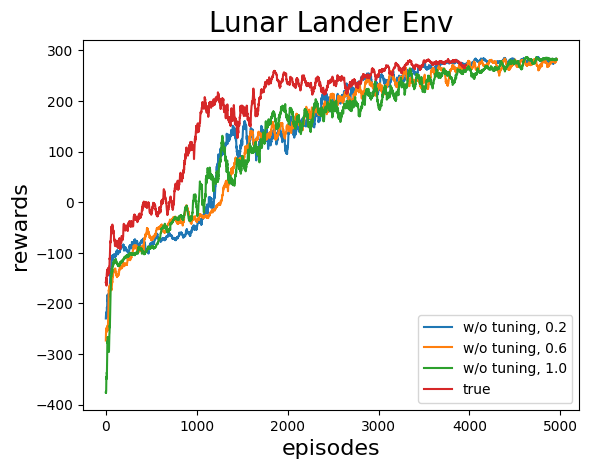

In [7]:
for d,a in zip(data,alpha2):
    r = d["rewards"]
    plt.plot(running_mean(r,40),label=a)
plt.plot(running_mean(data_true["rewards"],40),label="true")
plt.title("Lunar Lander Env",fontsize=20)

plt.xlabel("episodes",fontsize=16)
plt.ylabel("rewards",fontsize=16)
plt.legend()

Text(0, 0.5, 'rewards')

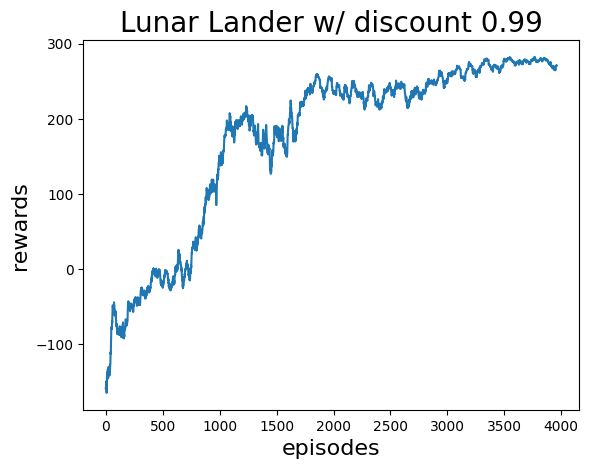

In [14]:
rewards = running_mean(data_true["rewards"],40)
plt.plot(rewards)
plt.title("Lunar Lander w/ discount 0.99",fontsize=20)

plt.xlabel("episodes",fontsize=16)
plt.ylabel("rewards",fontsize=16)


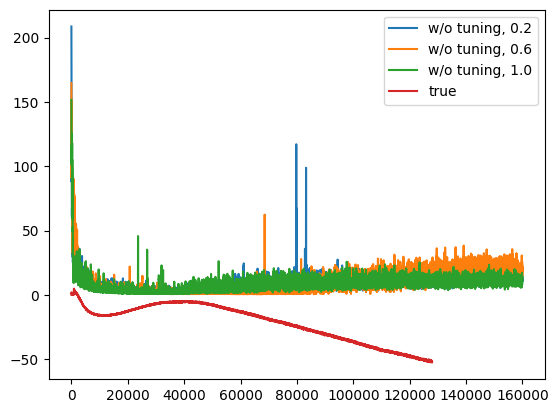

In [9]:
for d,a in zip(data,alpha2):
    r = d["Q_loss"]
    plt.plot(running_mean(r,40),label=a)
plt.plot(running_mean(data_true["P_loss"],40),label="true")
plt.legend()

In [10]:
f_lun = "SAC_LunarLander-v2-t5000-alpha1-alpha_tuningTrue-stat.pkl"
with open(f_lun, 'rb') as f:
    data_lun = pickle.load(f)


In [11]:
r_lun = data_lun["rewards"]
r_Q = data_lun["Q_loss"]
r_P = data_lun["P_loss"]

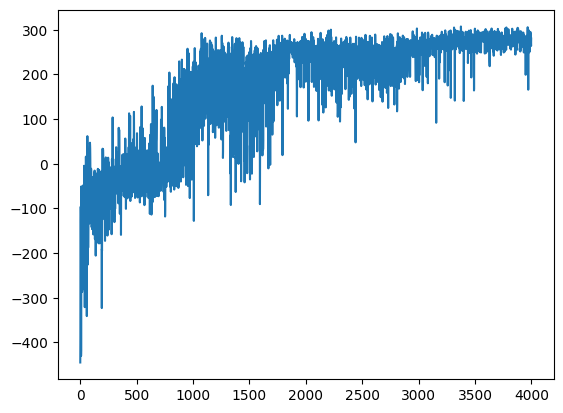

In [12]:
plt.plot(running_mean(r_lun,2))

In [13]:
#file_name = "SAC_Pendulum-v1-t5000-alpha0-alpha_tuningFalse-stat.pkl"
#with open(file_name, 'rb') as f:
#    data = pickle.load(f)
    

FileNotFoundError: [Errno 2] No such file or directory: 'SAC_Pendulum-v1-t5000-alpha0-alpha_tuningFalse-stat.pkl'

In [ ]:
alpha = [0,0.1,0.2,0.3,0.5,0.6,0.8,1]

In [ ]:
alpha2 = [0,0.2,0.5,0.8,1]

In [ ]:
file_name_list = [ f"SAC_Pendulum-v1-t5000-alpha{x}-alpha_tuningFalse-stat.pkl" for x in alpha2  ]
data_list = []
for name in file_name_list:
    with open(name, 'rb') as f:
        data1 = pickle.load(f)
        data_list.append(data1)

In [ ]:
reward_list = [ d["rewards"] for d in data_list ]

In [ ]:
def running_mean(x, N):
    cumsum = np.cumsum(np.insert(x, 0, 0)) 
    return (cumsum[N:] - cumsum[:-N]) / float(N)

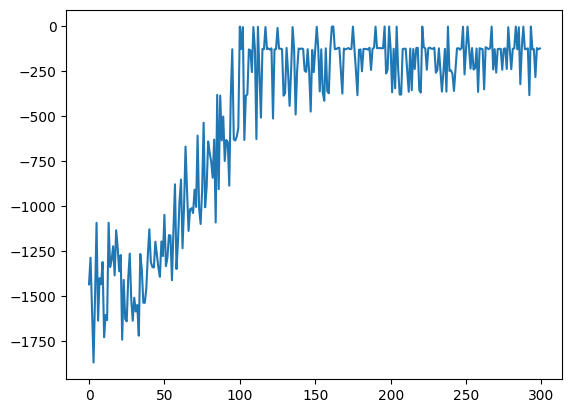

In [ ]:
f_true = "SAC_Pendulum-v1-t5000-alpha1-alpha_tuningTrue-stat.pkl"
with open(f_true, 'rb') as f:
    data_true = pickle.load(f)
plt.plot(data_true["rewards"][:300])

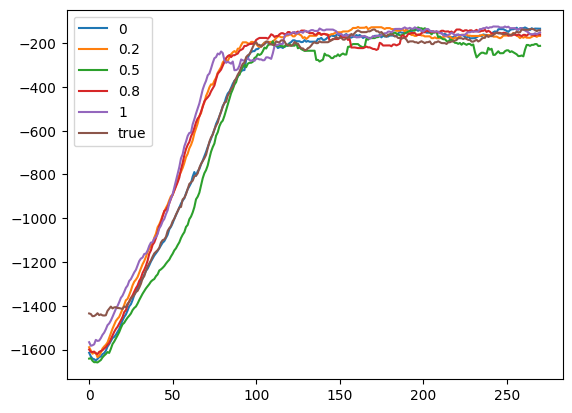

In [ ]:

for i, r in enumerate(reward_list):
    #plt.subplot(8,1,i+1)
    plt.plot(running_mean (r[:300], 30), label = alpha2[i])
plt.plot(running_mean(data_true["rewards"][:300],30),label="true")
plt.legend()

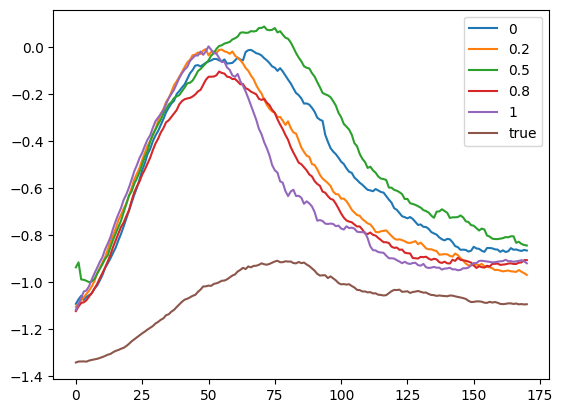

In [ ]:
log_prob = [d["Log_Prob"] for d in data_list]
for i, r in enumerate(log_prob):
    #plt.subplot(8,1,i+1)
    plt.plot(running_mean (r[:200], 30), label = alpha2[i])
plt.plot(running_mean(data_true["Log_Prob"][:200],30),label="true")
plt.legend()

In [ ]:
data.keys()

dict_keys(['rewards', 'lengths', 'random_seed', 'actor_lr', 'critic_lr', 'losses', 'Q_loss', 'P_loss', 'Log_Prob'])

In [ ]:
loss = data["losses"]
rewards = data["rewards"]

In [ ]:
loss =np.asanyarray(loss)

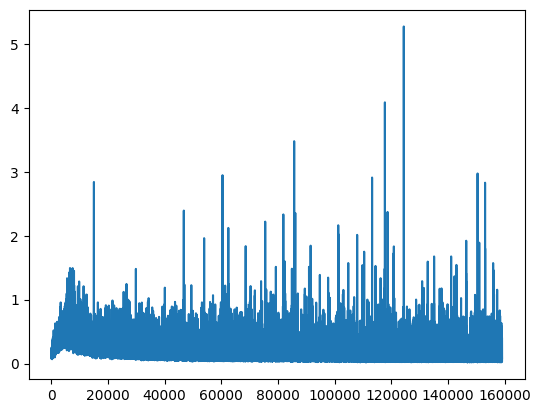

In [ ]:
plt.plot(loss[1000:,0])


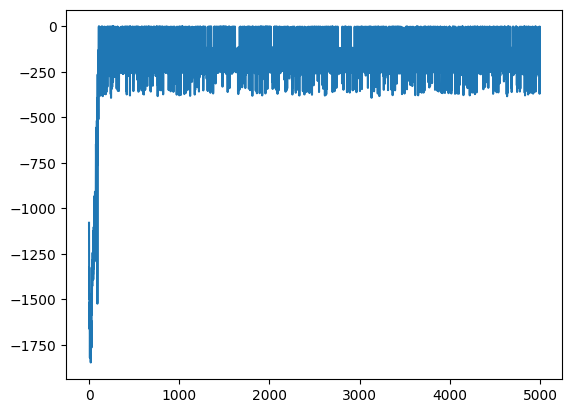

In [ ]:
plt.plot(rewards)

In [ ]:
loss

array([[8.97047577e+01, 3.89464527e-01],
       [7.36550064e+01, 9.85760927e-01],
       [6.04419212e+01, 1.59336269e+00],
       ...,
       [1.36237666e-01, 6.93759155e+00],
       [6.48448467e-02, 6.02251720e+00],
       [8.26377273e-02, 6.99618912e+00]])

In [ ]:
f_lun8000 = "SAC_LunarLander-v2-t8000-alpha1-alpha_tuningTrue-stat.pkl"
with open(f_lun8000, 'rb') as f:
    data_lun8000 = pickle.load(f)

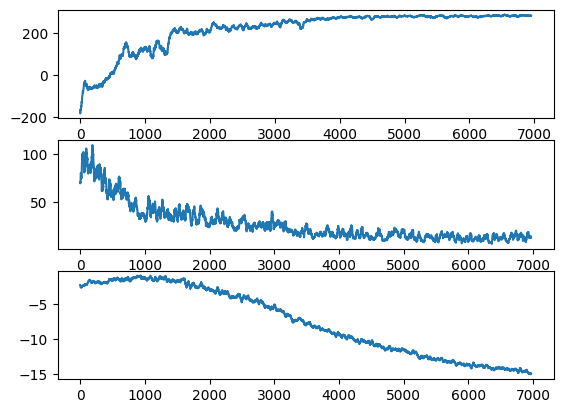

In [ ]:
plt.subplot(3,1,1)
plt.plot(running_mean(data_lun8000["rewards"][:7000],50))
plt.subplot(3,1,2)
plt.plot(running_mean(data_lun8000["Q_loss"][:7000],30))
plt.subplot(3,1,3)
plt.plot(running_mean(data_lun8000["P_loss"][:7000],30))

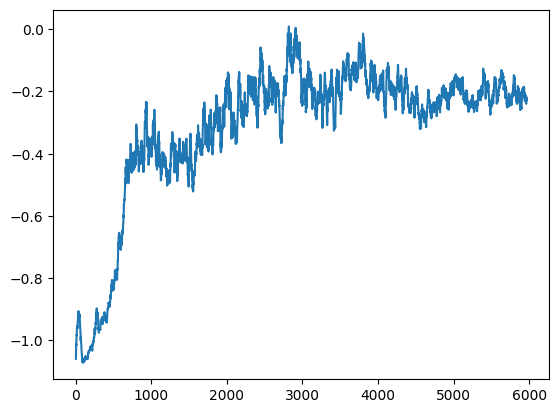

In [ ]:
plt.plot(running_mean(data_lun8000["Log_Prob"][:6000],30))

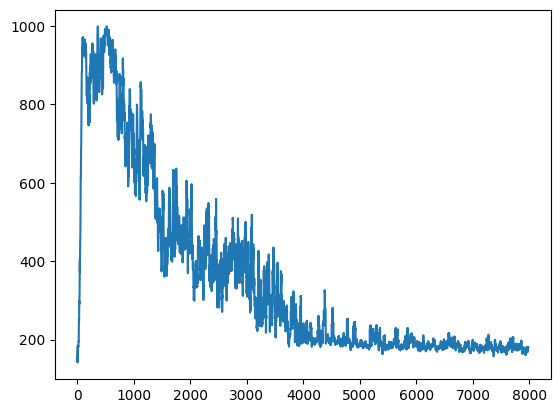

In [ ]:
plt.plot(running_mean(data_lun8000["lengths"],20))